#**EDA**

In [25]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns
import plotly.express as px

In [26]:
#load the dataset
data=pd.read_excel("project-data.xlsx")

In [27]:
data.head() #first 5 rows

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [28]:
data.shape #rows and columns

(615, 13)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [30]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [31]:
#check the datatypes
data.dtypes

,0
category,object
age,int64
sex,object
albumin,float64
alkaline_phosphatase,float64
alanine_aminotransferase,float64
aspartate_aminotransferase,float64
bilirubin,float64
cholinesterase,float64
cholesterol,float64


In [32]:
# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numerical Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
['age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina', 'gamma_glutamyl_transferase', 'protein']

Categorical Columns:
['category', 'sex']


In [33]:
#check for null/missing values
data.isnull().sum()

,0
category,0
age,0
sex,0
albumin,1
alkaline_phosphatase,18
alanine_aminotransferase,1
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,10


In [34]:
# target variable distribution
data['category'].value_counts()

,count
category,
no_disease,533
cirrhosis,30
hepatitis,24
fibrosis,21
suspect_disease,7


In [35]:
# Summary stats for numerical columns
data.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [36]:
# 3. Encode 'sex' column
data['sex'] = data['sex'].map({'m': 1, 'f': 0})

In [37]:
data

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


#**VISUALIZATIONS**

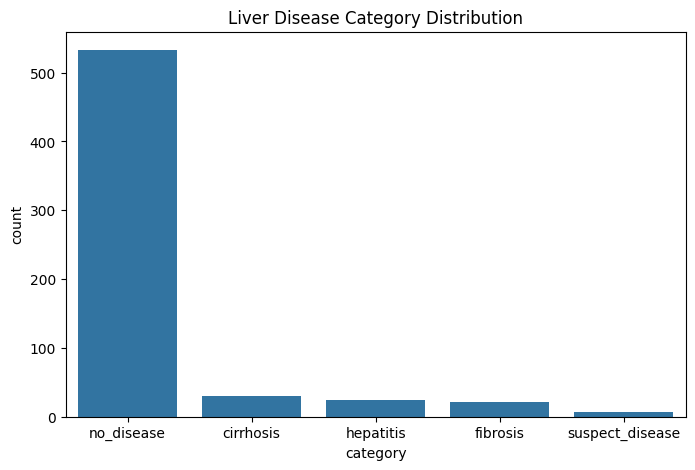

In [38]:
# count plot of target distribution
plt.figure(figsize=(8, 5))
fig=sns.countplot(x='category', data=data, order=data['category'].value_counts().index)
plt.title('Liver Disease Category Distribution')
plt.show()

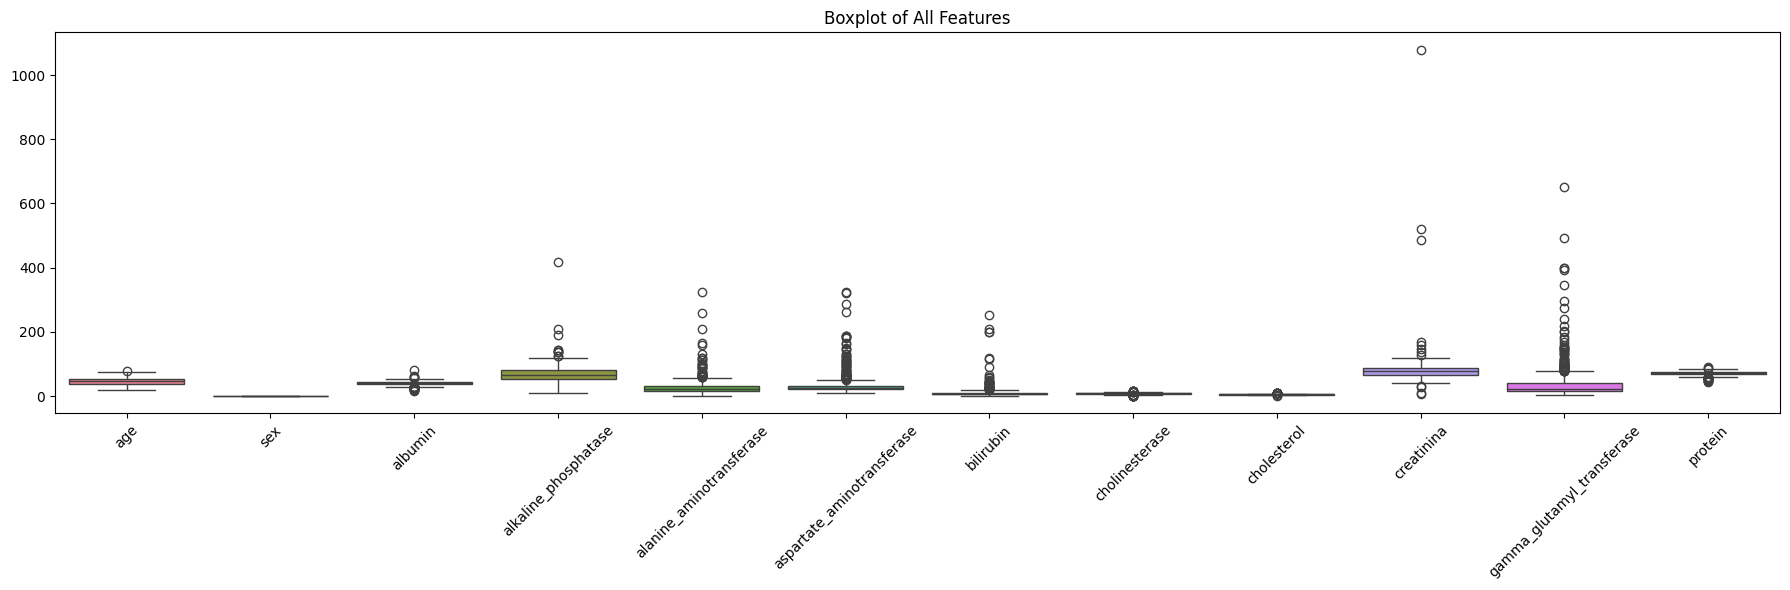

In [39]:
# 2. Boxplot for all numerical features
plt.figure(figsize=(18, 6))
sns.boxplot(data=data.drop(columns=['category']))
plt.title('Boxplot of All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# 3. Histograms of all numerical features
import plotly.express as px

fig = px.histogram(data, x='category', title='Liver Disease Category Distribution',
                   category_orders={'category': data['category'].value_counts().index.tolist()})
fig.show()

In [48]:


cols_to_plot = ['albumin', 'bilirubin', 'alkaline_phosphatase', 'alanine_aminotransferase',
                'aspartate_aminotransferase', 'cholinesterase', 'creatinina',
                'gamma_glutamyl_transferase', 'protein']

for col in cols_to_plot:
    fig = px.bar(data, x='category', y=col,
                 category_orders={'category': data['category'].value_counts().index.tolist()},
                 title=f'{col.replace("_", " ").title()} by Disease Category')

    fig.show()

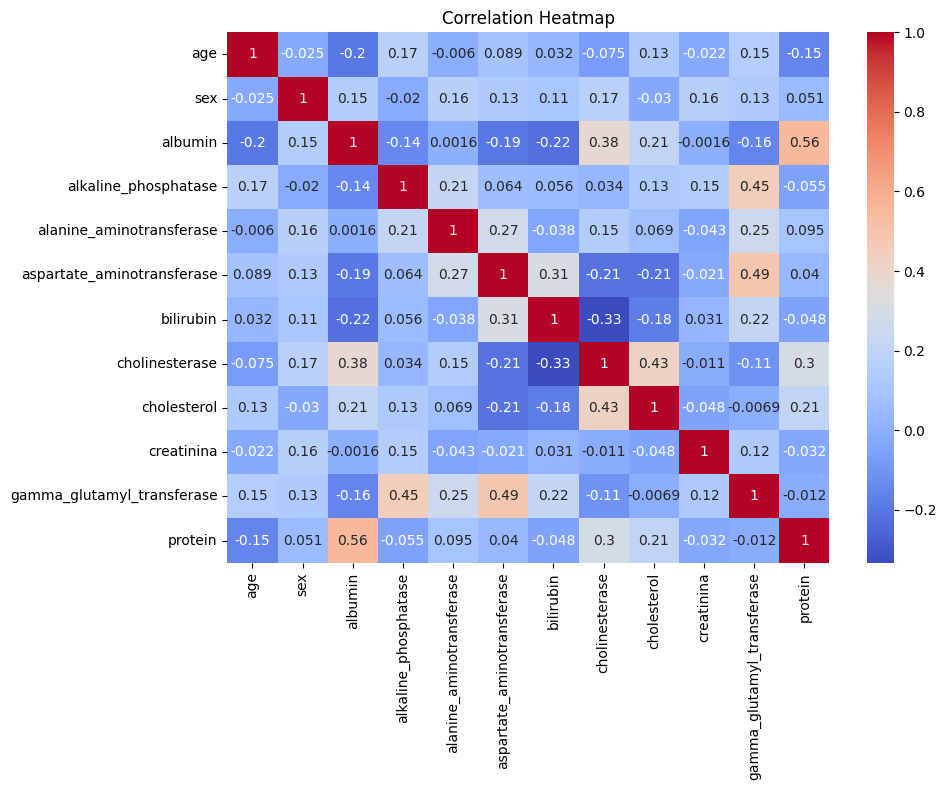

In [42]:
#correlation map
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['category']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [43]:
#scatter plt between albuminn and bilirubin

fig = px.scatter(data, x='albumin', y='bilirubin', color='category',
                 category_orders={'category': data['category'].value_counts().index.tolist()},
                 title='Scatter Plot of Albumin vs Bilirubin by Disease Category',
                 labels={'albumin': 'Albumin (g/L)', 'bilirubin': 'Bilirubin (mg/L)'},
                 hover_data=['age', 'sex'])  # Add more info on hover if you want

fig.show()


In [44]:
#scatter plt between alkaline_phosphatase and gamma_glutamyl_transferase

fig = px.scatter(data, x='alkaline_phosphatase', y='gamma_glutamyl_transferase', color='category',
                 category_orders={'category': data['category'].value_counts().index.tolist()},
                 title='Scatter Plot of Alkaline Phosphatase vs Gamma Glutamyl Transferase by Disease Category',
                 labels={
                     'alkaline_phosphatase': 'Alkaline Phosphatase (U/L)',
                     'gamma_glutamyl_transferase': 'Gamma Glutamyl Transferase (IU/L)'
                 },
                 hover_data=['age', 'sex'])

fig.show()


In [45]:
#scatter plt between Cholesterol and protein

fig = px.scatter(data, x='cholesterol', y='protein', color='category',
                 category_orders={'category': data['category'].value_counts().index.tolist()},
                 title='Scatter Plot of Cholesterol vs Protein by Disease Category',
                 labels={
                     'cholesterol': 'Cholesterol (mmol/L)',
                     'protein': 'Protein (mg)'
                 },
                 hover_data=['age', 'sex'])  # Optional additional info on hover

fig.show()


In [46]:
#Fill missing values using median imputation
#Good for numerical medical data (robust to outliers).
# Median imputation for numerical columns with missing data

data['albumin'] = data['albumin'].fillna(data['albumin'].median())
data['alkaline_phosphatase'] = data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].median())
data['alanine_aminotransferase'] = data['alanine_aminotransferase'].fillna(data['alanine_aminotransferase'].median())
data['cholesterol'] = data['cholesterol'].fillna(data['cholesterol'].median())
data['protein'] = data['protein'].fillna(data['protein'].median())






In [47]:
#check whether all null values are cleared
print(data.isnull().sum())


category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64
